In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import upfirdn
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.sigsys as ss
import common
import random
from fxpmath import Fxp

In [2]:
fs = 80000000 # Clock frecuency
Lsrrc = 4
L1 = 2
L2 = 4
L3 = 5
Tinterpolation = Lsrrc * L1 * L2 * L3
print("M  = {0}".format(Tinterpolation))

M  = 160


In [3]:
# SRRC calculate
beta = 0.25
# Number of symbol
span = 6.0
# Number of sample per symobl
sps  = Lsrrc
# Calculate SRRC filter
h = common.rcosdesign(beta, span, sps, 'normal')

hsrrc = Fxp(h, signed=True, n_word=16, n_frac=15).astype(float)
hsrrc

array([ 0.        ,  0.02636719,  0.04476929,  0.03796387,  0.        ,
       -0.05532837, -0.09594727, -0.08483887,  0.        ,  0.15008545,
        0.3243103 ,  0.4637146 ,  0.51693726,  0.4637146 ,  0.3243103 ,
        0.15008545,  0.        , -0.08483887, -0.09594727, -0.05532837,
        0.        ,  0.03796387,  0.04476929,  0.02636719,  0.        ])

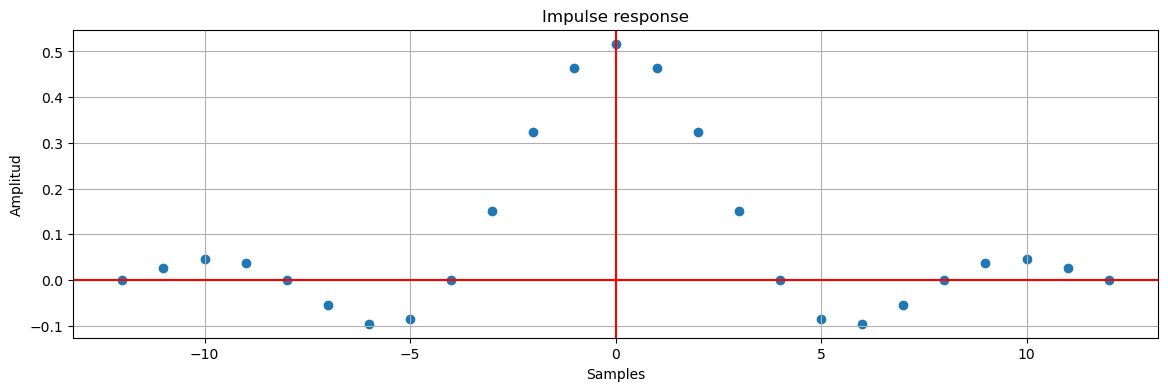

In [4]:
# Plot the SRRCfilter coeficients
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(4)
plt.title('Impulse response')
x_midrange = (span * sps) / 2 
x_range = (span * sps) + 1.0
x = np.linspace(-x_midrange, x_midrange, int(x_range))
plt.scatter(x,hsrrc)
plt.grid()
plt.xlabel("Samples")
plt.ylabel("Amplitud")
plt.axhline(0,color='red') # x = 0
plt.axvline(0,color='red') # x = 0
plt.show()

array([ 0.0035439 ,  0.00214155, -0.00509047, -0.00747269,  0.0014465 ,
        0.00628668, -0.00453354, -0.01108536,  0.00392221,  0.01428798,
       -0.00517977, -0.0202939 ,  0.00537768,  0.02775619, -0.00604119,
       -0.03946582,  0.00633181,  0.05919986, -0.00667526, -0.10340662,
        0.00682683,  0.31738908,  0.49309164,  0.31738908,  0.00682683,
       -0.10340662, -0.00667526,  0.05919986,  0.00633181, -0.03946582,
       -0.00604119,  0.02775619,  0.00537768, -0.0202939 , -0.00517977,
        0.01428798,  0.00392221, -0.01108536, -0.00453354,  0.00628668,
        0.0014465 , -0.00747269, -0.00509047,  0.00214155,  0.0035439 ])

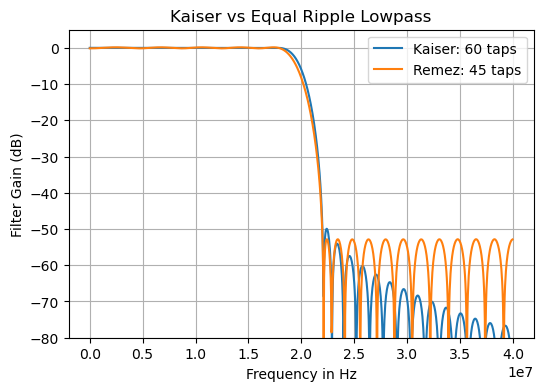

In [5]:
fpass = 0.45*fs/L1
fstop = 0.55*fs/L1
fstopDB = 50 
b_k = fir_d.firwin_kaiser_lpf(fpass,fstop,fstopDB,fs)
L1_r = fir_d.fir_remez_lpf(fpass,fstop,0.2,fstopDB,fs)

fir_d.freqz_resp_list([b_k,L1_r],[[1],[1]],'dB',fs)
plt.ylim([-80,5])
plt.title(r'Kaiser vs Equal Ripple Lowpass')
plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in Hz')
plt.legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(L1_r)),loc='best')
plt.grid();
L1_r

array([-6.74063810e-05,  1.23623762e-03,  2.26077016e-03,  3.34405645e-03,
        3.75813262e-03,  3.05188197e-03,  1.24577355e-03, -1.03977567e-03,
       -2.78043559e-03, -3.04038306e-03, -1.53106986e-03,  1.09433546e-03,
        3.44711169e-03,  4.08688050e-03,  2.36401256e-03, -1.06062115e-03,
       -4.39605342e-03, -5.61589890e-03, -3.64437421e-03,  8.39904301e-04,
        5.52821957e-03,  7.61898159e-03,  5.43505662e-03, -3.80812001e-04,
       -6.88722519e-03, -1.02532093e-02, -7.93826738e-03, -4.28683349e-04,
        8.56771980e-03,  1.38349179e-02,  1.15473484e-02,  1.79904789e-03,
       -1.07857337e-02, -1.90466940e-02, -1.71211534e-02, -4.18557299e-03,
        1.40981597e-02,  2.76500925e-02,  2.69886138e-02,  8.89278827e-03,
       -2.02808459e-02, -4.57905450e-02, -5.02819582e-02, -2.18505689e-02,
        3.93136574e-02,  1.19087318e-01,  1.93710615e-01,  2.38717106e-01,
        2.38717106e-01,  1.93710615e-01,  1.19087318e-01,  3.93136574e-02,
       -2.18505689e-02, -

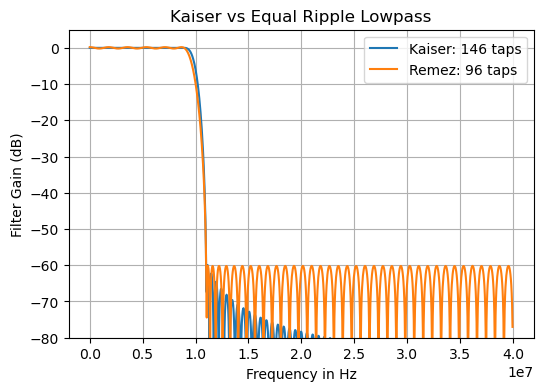

In [6]:
fpass = 0.45*fs/L2
fstop = 0.55*fs/L2
fstopDB = 60 
b_k = fir_d.firwin_kaiser_lpf(fpass,fstop,fstopDB,fs)
L2_r = fir_d.fir_remez_lpf(fpass,fstop,0.2,fstopDB,fs)

fir_d.freqz_resp_list([b_k,L2_r],[[1],[1]],'dB',fs)
plt.ylim([-80,5])
plt.title(r'Kaiser vs Equal Ripple Lowpass')
plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in Hz')
plt.legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(L2_r)),loc='best')
plt.grid();
L2_r

array([-1.05588403e-04, -2.75337455e-03, -2.75505849e-03, -3.30723396e-03,
       -3.14409034e-03, -2.19636996e-03, -6.22435057e-04,  1.15723039e-03,
        2.56735568e-03,  3.07923827e-03,  2.41671871e-03,  7.08262801e-04,
       -1.50231266e-03, -3.40669059e-03, -4.21085203e-03, -3.44976578e-03,
       -1.21553454e-03,  1.80383265e-03,  4.51509882e-03,  5.80206174e-03,
        4.96235392e-03,  2.04461081e-03, -2.07300621e-03, -5.91737991e-03,
       -7.92812952e-03, -7.06300244e-03, -3.28038268e-03,  2.31391856e-03,
        7.74795036e-03,  1.08463793e-02,  1.00562528e-02,  5.14573562e-03,
       -2.52510623e-03, -1.03116711e-02, -1.51384788e-02, -1.46337435e-02,
       -8.15566283e-03,  2.69743594e-03,  1.43494695e-02,  2.22961877e-02,
        2.26609559e-02,  1.37701731e-02, -2.82399663e-03, -2.22887708e-02,
       -3.75720199e-02, -4.13481621e-02, -2.83084444e-02,  2.90002797e-03,
        4.87695381e-02,  1.01374817e-01,  1.50171692e-01,  1.84642741e-01,
        1.97073492e-01,  

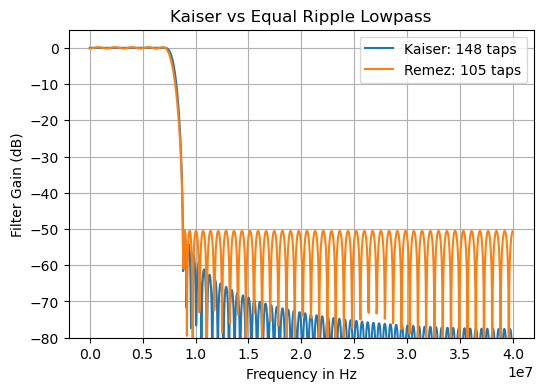

In [7]:
fpass = 0.45*fs/L3
fstop = 0.55*fs/L3
fstopDB = 50 
b_k = fir_d.firwin_kaiser_lpf(fpass,fstop,fstopDB,fs)
L3_r = fir_d.fir_remez_lpf(fpass,fstop,0.2,fstopDB,fs)

fir_d.freqz_resp_list([b_k,L3_r],[[1],[1]],'dB',fs)
plt.ylim([-80,5])
plt.title(r'Kaiser vs Equal Ripple Lowpass')
plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in Hz')
plt.legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(L3_r)),loc='best')
plt.grid();
L3_r

In [8]:
print("Tap number SRRC := {0}".format(len(hsrrc)))
print("Tap number L1   := {0}".format(len(L1_r)))
print("Tap number L2   := {0}".format(len(L2_r)))
print("Tap number L3   := {0}".format(len(L3_r)))
print("Tap Total       := {0}".format(len(L3_r)+len(L2_r)+len(L1_r)+len(hsrrc)))

Tap number SRRC := 25
Tap number L1   := 45
Tap number L2   := 96
Tap number L3   := 105
Tap Total       := 271


In [11]:
# Binary sequence generation
num_d = 500
data_bin_tx = np.random.randint(2, size=num_d).tolist()

# BPSK codification
d_tx = common.code_bpsk(data_bin_tx)
d_tx = list(map(lambda i:d_tx[i].real , range(0, len(d_tx))))

2021
4085
16432
82260
input : 500 output = 82260


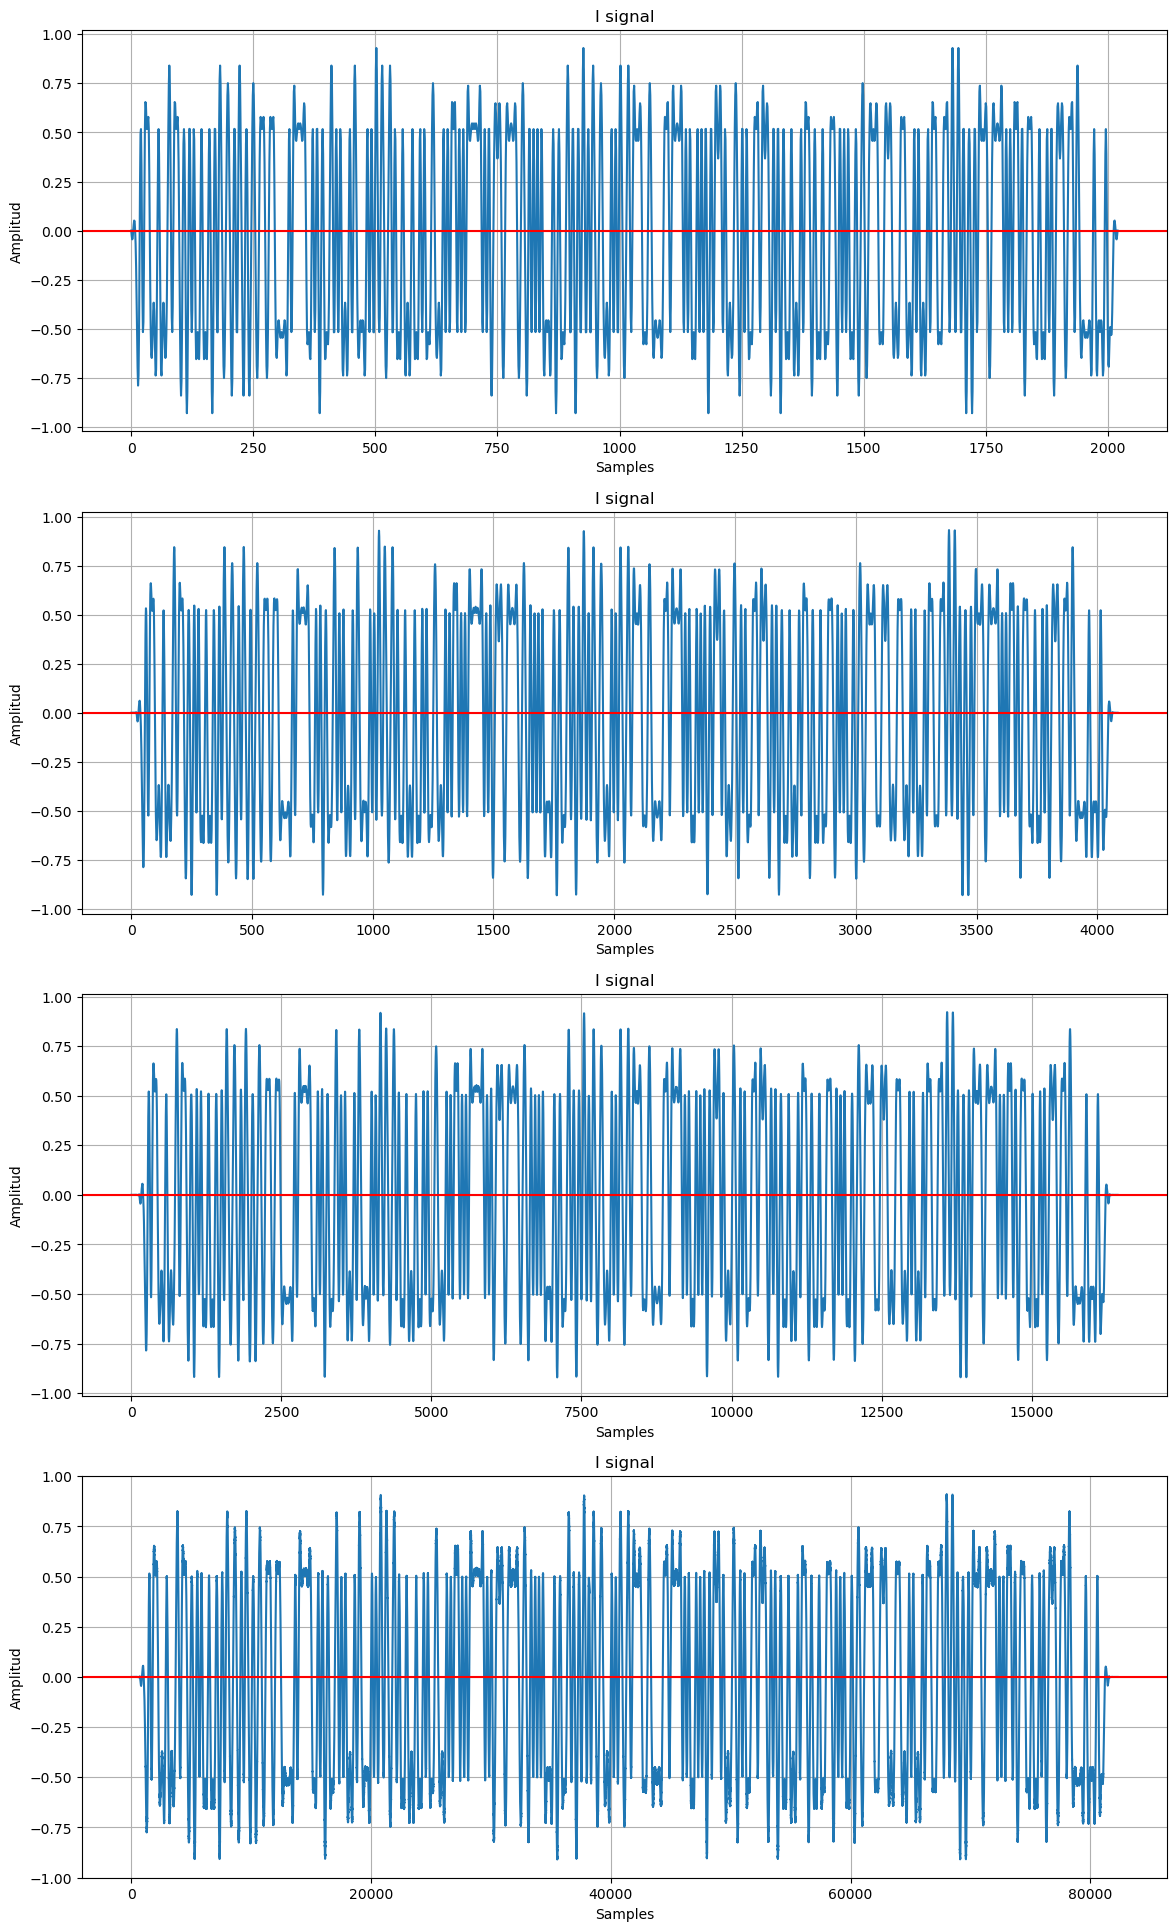

In [12]:
# UP converter with SRRC filter
signal_srrc =  upfirdn(hsrrc, d_tx, up=Lsrrc)
print(len(signal_srrc))
# UP converter with L1
signal_L1   =  upfirdn(L1_r * 2, signal_srrc, up=L1)
print(len(signal_L1))
# UP converter with L2
signal_L2   =  upfirdn(L2_r * 4, signal_L1, up=L2)
print(len(signal_L2))
# UP converter with L3
signal_L3   =  upfirdn(L3_r * 5, signal_L2, up=L3)
print(len(signal_L3))

print("input : {0} output = {1}".format(len(d_tx),len(signal_L3)))

# Plot the signal after UP-CONVERTE
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4)
fig.set_figwidth(14)
fig.set_figheight(24)

ax1.set_title('I signal')
ax1.plot(signal_srrc)
ax1.grid()
ax1.set_xlabel("Samples")
ax1.set_ylabel("Amplitud")
ax1.axhline(0,color='red') # x = 0

ax2.set_title('I signal')
ax2.plot(signal_L1)
ax2.grid()
ax2.set_xlabel("Samples")
ax2.set_ylabel("Amplitud")
ax2.axhline(0,color='red') # x = 0

ax3.set_title('I signal')
ax3.plot(signal_L2)
ax3.grid()
ax3.set_xlabel("Samples")
ax3.set_ylabel("Amplitud")
ax3.axhline(0,color='red') # x = 0

ax4.set_title('I signal')
ax4.plot(signal_L3)
ax4.grid()
ax4.set_xlabel("Samples")
ax4.set_ylabel("Amplitud")
ax4.axhline(0,color='red') # x = 0

(-150.0, 0.0)

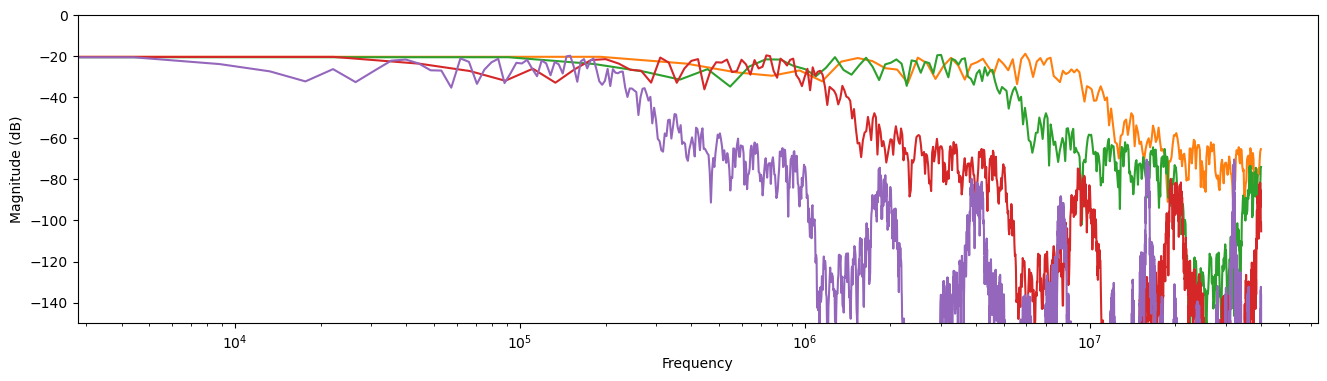

In [218]:
import numpy as np
import matplotlib.pyplot as plt


fig, ax = plt.subplots(nrows=1, ncols=1) #create figure handle
fig.set_figwidth(16)
fig.set_figheight(4)

#X = (10 * np.log10(X))
#min(signal_L3)
ax.magnitude_spectrum(signal_srrc, scale='dB', Fs=fs, color='C1')
ax.magnitude_spectrum(signal_L1, scale='dB', Fs=fs, color='C2')
ax.magnitude_spectrum(signal_L2, scale='dB', Fs=fs, color='C3')
ax.magnitude_spectrum(signal_L3, scale='dB', Fs=fs, color='C4')
ax.set_xscale('log')
ax.set_ylim(-150, 0)


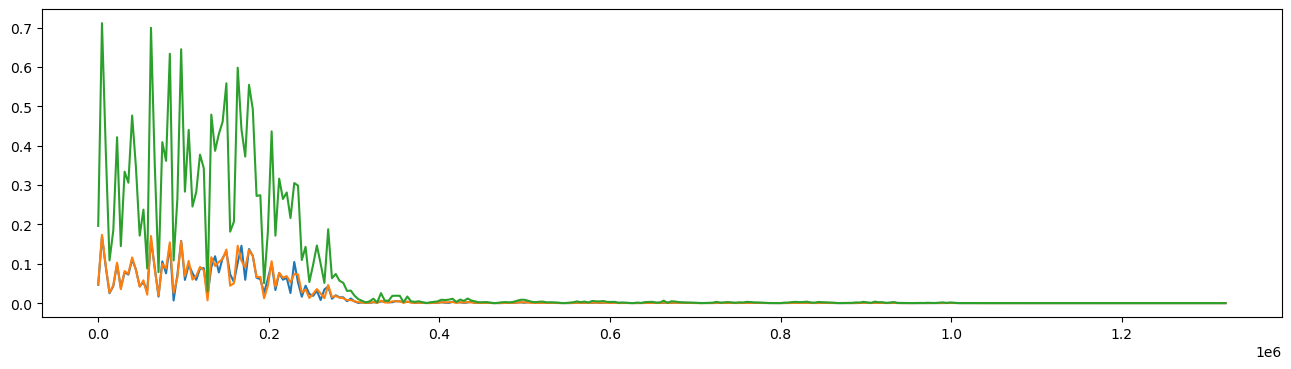

In [225]:
import scipy

# Number of samplepoints
N3 = len(signal_L3)
N2 = len(signal_L2)
N1 = len(signal_L1)
# sample spacing
T = 1.0 / fs
x1 = np.linspace(0.0, N3*T, N3)
x2 = np.linspace(0.0, N2*T, N2)
x3 = np.linspace(0.0, N1*T, N1)

xf3 = np.linspace(0.0, 1.0/(2.0*T), N3//2)
xf2 = np.linspace(0.0, 1.0/(2.0*T), N2//2)
xf1 = np.linspace(0.0, 1.0/(2.0*T), N1//2)
yf3x = 2.0/N3 * np.abs(scipy.fftpack.fft(signal_L3)[:N3//2])
yf2x = 2.0/N2 * np.abs(scipy.fftpack.fft(signal_L2)[:N2//2])
yf1x = 2.0/N1 * np.abs(scipy.fftpack.fft(signal_L2)[:N1//2])
fig, ax = plt.subplots()
fig.set_figwidth(16)
fig.set_figheight(4)
Lt = 300
ax.plot(xf3[:Lt], yf3x[:Lt])
ax.plot(xf3[:Lt], yf2x[:Lt])
ax.plot(xf3[:Lt], yf1x[:Lt])

plt.show()